In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
data = pd.read_pickle('./data.pkl')
data.head(10)

Symbols,AAPL,MSFT,^GSPC
2012-08-03,87.957146,29.750000,1390.989990
2012-08-06,88.935715,29.950001,1394.229980
2012-08-07,88.701431,30.260000,1401.349976
2012-08-08,88.551430,30.330000,1402.219971
2012-08-09,88.675713,30.500000,1402.800049
2012-08-10,88.814285,30.420000,1405.869995
2012-08-13,90.000000,30.389999,1404.109985
2012-08-14,90.241432,30.129999,1403.930054
2012-08-15,90.118568,30.200001,1405.530029
2012-08-16,90.905716,30.780001,1415.510010


In [3]:
date_formatter = mdates.DateFormatter('%m/%y')

### Moving average considerations

In [4]:
# SMA for short-window
short_rol = data.rolling(20).mean()
short_rol.head(20)

Symbols,AAPL,MSFT,^GSPC
2012-08-03,NaN,NaN,NaN
2012-08-06,NaN,NaN,NaN
2012-08-07,NaN,NaN,NaN
2012-08-08,NaN,NaN,NaN
2012-08-09,NaN,NaN,NaN
2012-08-10,NaN,NaN,NaN
2012-08-13,NaN,NaN,NaN
2012-08-14,NaN,NaN,NaN
2012-08-15,NaN,NaN,NaN
2012-08-16,NaN,NaN,NaN


In [5]:
# SMA for long-window
long_rol = data.rolling(100).mean()
long_rol.tail()

Symbols,AAPL,MSFT,^GSPC
2016-12-26,111.7931,59.0630,2176.628792
2016-12-27,111.8776,59.1138,2177.500190
2016-12-28,111.9652,59.1635,2178.244490
2016-12-29,112.0532,59.2095,2178.879189
2016-12-30,112.1296,59.2515,2179.426990


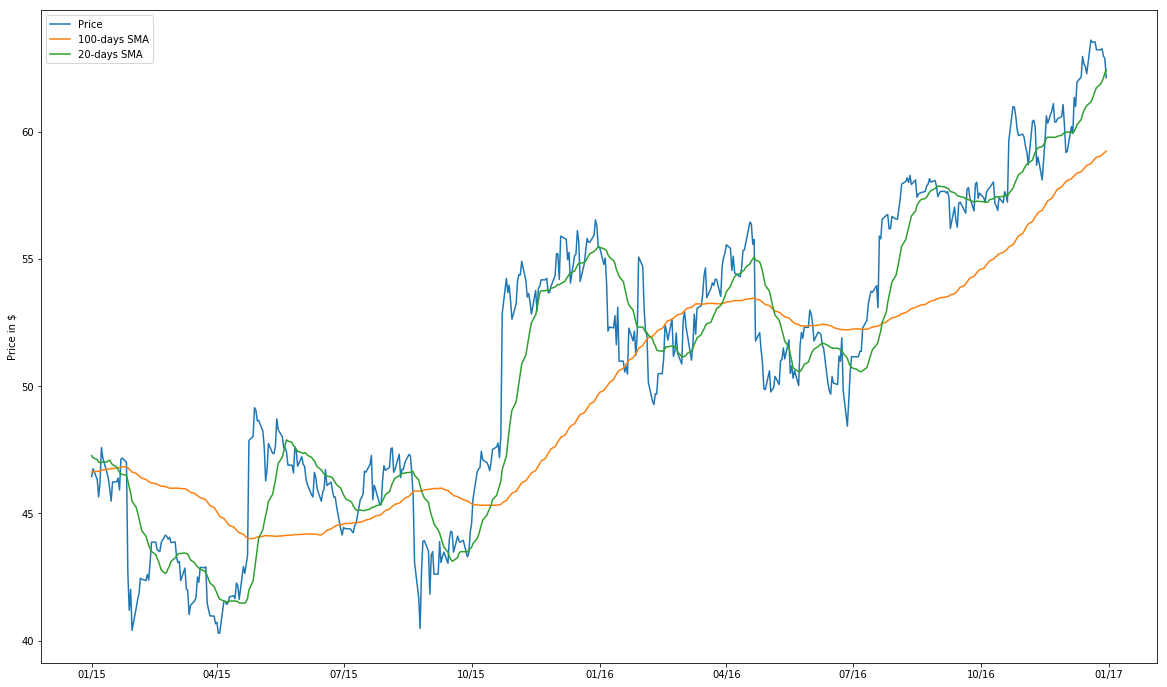

In [6]:
start_date = '2015-01-01'
end_date = '2016-12-31'

fig, ax = plt.subplots(figsize=(20,12))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'], label='Price')
ax.plot(long_rol.loc[start_date:end_date, :].index, long_rol.loc[start_date:end_date, 'MSFT'], label = '100-days SMA')
ax.plot(short_rol.loc[start_date:end_date, :].index, short_rol.loc[start_date:end_date, 'MSFT'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(date_formatter)